In [1]:
# Uninstall current versions
!pip uninstall torch torchvision -y

Found existing installation: torch 2.4.0
Uninstalling torch-2.4.0:
  Successfully uninstalled torch-2.4.0
Found existing installation: torchvision 0.19.0
Uninstalling torchvision-0.19.0:
  Successfully uninstalled torchvision-0.19.0


In [2]:
!pip install peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 7.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 79.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 62.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 5.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 13.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 8.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━

In [3]:
# Install compatible versions
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 48.9 MB/s eta 0:00:0000:0100:01


In [12]:
import os
import json
import torch
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from transformers import ViTFeatureExtractor, VisionEncoderDecoderModel, AutoProcessor
from peft import LoraConfig, get_peft_model
import wandb
from torch.utils.tensorboard import SummaryWriter

#os.environ["WANDB_DISABLED"] = "false"

#wandb.init()
writer = SummaryWriter(log_dir='/kaggle/working/runs/image_to_text')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loc = "ydshieh/vit-gpt2-coco-en"

In [13]:
feature_extractor = ViTFeatureExtractor.from_pretrained(loc)
model = VisionEncoderDecoderModel.from_pretrained(loc)
processor = AutoProcessor.from_pretrained(loc)

preprocessor_config.json:   0%|          | 0.00/211 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/4.34k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

VisionEncoderDecoderModel has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


tokenizer_config.json:   0%|          | 0.00/236 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [24]:
model = model.to(device)

In [25]:
# Charger les données depuis le fichier JSON
with open('/kaggle/input/image-to-text-palestine/custom_palestine_data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [26]:
class ImageCaptioningDataset(Dataset):
    def __init__(self, data, processor, feature_extractor, img_dir):
        self.data = data
        self.processor = processor
        self.feature_extractor = feature_extractor
        self.img_dir = img_dir

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        img_path = os.path.join(self.img_dir, item["image"])
        image = Image.open(img_path).convert("RGB")
        encoding = self.feature_extractor(images=image, return_tensors="pt")
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        # Utiliser la réponse du modèle GPT comme texte de description
        encoding["text"] = item["conversations"][-1]["value"]  # Dernière réponse dans les conversations
        return encoding

In [27]:
# Spécifiez le répertoire contenant vos images
image_directory = "/kaggle/input/image-to-text-palestine/pfa_dataset/pfa_dataset"
train_dataset = ImageCaptioningDataset(data, processor, feature_extractor, image_directory)

In [28]:
# Lora configuration
config = LoraConfig(
    r=16,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    target_modules=["query", "value"],
)

model = get_peft_model(model, config)

In [29]:
## Trainable Params
def print_trainable_parameters(model):
    """Imprime le nombre de paramètres entraînables dans le modèle."""
    trainable_params, all_param = 0, 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad: trainable_params += param.numel()
    print(f"trainable params: {trainable_params} || all params: {all_param} || trainable %: {100 * trainable_params / all_param}")

print_trainable_parameters(model)

trainable params: 589824 || all params: 239785728 || trainable %: 0.2459796105963404


In [30]:
def collator(batch):
    processed_batch = {}
    for key in batch[0].keys():
        if key != "text":
            processed_batch[key] = torch.stack([example[key] for example in batch])
        else:
            text_inputs = processor([example["text"] for example in batch], padding=True, return_tensors="pt")
            processed_batch["input_ids"] = text_inputs["input_ids"]
            processed_batch["attention_mask"] = text_inputs["attention_mask"]
    return processed_batch

In [31]:
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=3, collate_fn=collator)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

In [37]:
%load_ext tensorboard 
%tensorboard --logdir /kaggle/working/runs/image_to_text

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 196), started 7:13:00 ago. (Use '!kill 196' to kill it.)

In [33]:
epochs = 100   
loss_list = []
model.train()
for epoch in range(1, epochs + 1):
    for idx, batch in enumerate(train_dataloader):
        input_ids = batch.pop("input_ids").to(device)
        pixel_values = batch.pop("pixel_values").to(device, torch.float16)

        outputs = model(pixel_values=pixel_values, labels=input_ids)
        loss = outputs.loss
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        # Loguer la perte dans TensorBoard
        writer.add_scalar('Loss/train', loss.item(), epoch * len(train_dataloader) + idx)

    if epoch % 5 == 0: 
        print(f"Epoch {epoch} done!, Loss: {loss.item()}")
    loss_list.append(loss.item())

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


Epoch 5 done!, Loss: 6.785472869873047
Epoch 10 done!, Loss: 7.880867958068848
Epoch 15 done!, Loss: 5.0928874015808105
Epoch 20 done!, Loss: 5.922804832458496
Epoch 25 done!, Loss: 10.156412124633789
Epoch 30 done!, Loss: 5.653066158294678
Epoch 35 done!, Loss: 7.019609451293945
Epoch 40 done!, Loss: 4.488626956939697
Epoch 45 done!, Loss: 5.066242694854736
Epoch 50 done!, Loss: 5.5046491622924805
Epoch 55 done!, Loss: 5.933950424194336
Epoch 60 done!, Loss: 4.572973728179932
Epoch 65 done!, Loss: 5.511852264404297
Epoch 70 done!, Loss: 3.951829195022583
Epoch 75 done!, Loss: 6.1922760009765625
Epoch 80 done!, Loss: 6.383619785308838
Epoch 85 done!, Loss: 5.606863021850586
Epoch 90 done!, Loss: 6.00023078918457
Epoch 95 done!, Loss: 5.58699369430542
Epoch 100 done!, Loss: 5.8037519454956055


In [34]:
model_save_path = "/kaggle/working/image-to-text"  # Spécifiez le chemin où vous souhaitez sauvegarder le modèle
model.save_pretrained(model_save_path)
processor.save_pretrained(model_save_path)

print(f"Modèle fine-tuné enregistré à l'emplacement : {model_save_path}")

Modèle fine-tuné enregistré à l'emplacement : /kaggle/working/image-to-text


In [38]:
import shutil
# Zipping the fine-tuned model folder
shutil.make_archive(model_save_path, 'zip', model_save_path)

'/kaggle/working/image-to-text.zip'

In [35]:
# Fermer le writer de TensorBoard
writer.close()

In [97]:
!wget -O /kaggle/working/image_4.jpg "https://eventscal.lau.edu.lb/students/images/solidaritystudentcouncilbanner.jpg"

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2024-10-13 03:01:37--  https://eventscal.lau.edu.lb/students/images/solidaritystudentcouncilbanner.jpg
Resolving eventscal.lau.edu.lb (eventscal.lau.edu.lb)... 104.16.221.96, 104.16.222.96
Connecting to eventscal.lau.edu.lb (eventscal.lau.edu.lb)|104.16.221.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344185 (336K) [image/jpeg]
Saving to: '/kaggle/working/image_4.jpg'

/kaggle/working/ima 100%[===================>] 336.12K  --.-KB/s    in 0.04s   

2024-10-13 03:01:37 (7.51 MB/s) - '/kaggle/working/image_4.jpg' saved [344185/344185]



In [98]:
torch.cuda.empty_cache()

In [99]:
instruction = "Que se passe-t-il sur cette photo ?"  # Remplacez par votre instruction
model.eval()  # Mettre le modèle en mode évaluation

# Fonction pour générer une légende à partir d'une image avec une instruction
def generate_caption(image_path):
    # Charger et préparer l'image
    image = Image.open(image_path).convert("RGB")
    encoding = feature_extractor(images=image, return_tensors="pt").to(device)
    # Générer la légende
    with torch.no_grad():
        outputs = model.generate(**encoding)

    # Convertir les IDs en texte
    caption = processor.decode(outputs[0], skip_special_tokens=True)
    return caption

# Tester le modèle avec une image et une instruction
image_path = "/kaggle/working/image_4.jpg"  # Remplacez par le chemin de votre image
caption = generate_caption(image_path)  # Appel de la fonction
print("Légende générée :", caption)  # Afficher la légende générée

Légende générée : a large metal object with a large amount of water on it 


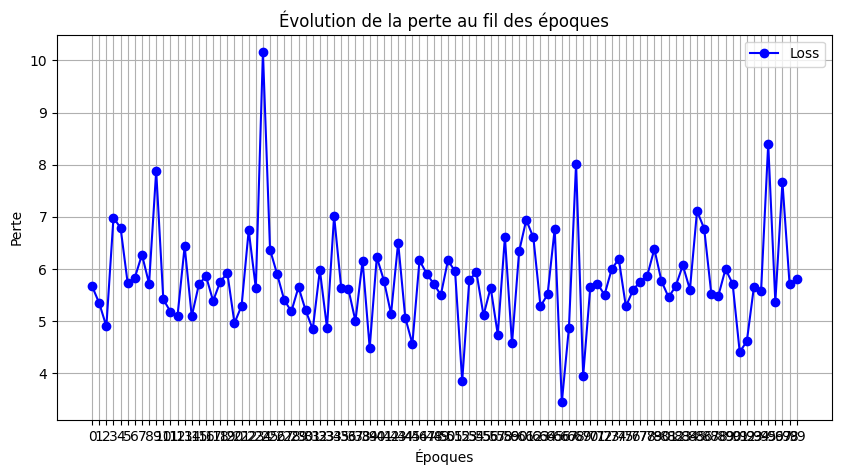

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(loss_list, marker='o', linestyle='-', color='b', label='Loss')
plt.title('Évolution de la perte au fil des époques')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.xticks(range(len(loss_list)))  # Marque les époques
plt.grid()
plt.legend()
plt.show()

In [105]:
plt.savefig('/kaggle/working/loss_plot.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>